In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.preprocessing import RobustScaler, PowerTransformer,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/uber-fares-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\yasserh\uber-fares-dataset\versions\1


In [4]:
df = pd.read_csv(r"C:\Users\HP\.cache\kagglehub\datasets\yasserh\uber-fares-dataset\versions\1\uber.csv")

In [5]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df.dropna(inplace=True)

In [8]:
# df.drop(columns=['Unnamed: 0'],inplace=True)


In [9]:
df.drop_duplicates()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [10]:
df = df.drop(columns = ['key'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   fare_amount        199999 non-null  float64
 2   pickup_datetime    199999 non-null  object 
 3   pickup_longitude   199999 non-null  float64
 4   pickup_latitude    199999 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 13.7+ MB


#### Trip Distance Calculation (Haversine Formula)

In [13]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c

# Example usage:
df['trip_distance_km'] = haversine_distance(df['pickup_latitude'], df['pickup_longitude'],
                                            df['dropoff_latitude'], df['dropoff_longitude'])


#### Extracting Date & Time Features

In [16]:
import pandas as pd

# Convert to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract useful features
df['pickup_hour'] = df['pickup_datetime'].dt.hour  # Hour of the day (0-23)
df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['is_weekend'] = df['pickup_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for Sat-Sun, 0 for weekdays
df['is_night'] = df['pickup_hour'].apply(lambda x: 1 if (x < 6 or x >= 22) else 0)  # 1 for night-time rides

# Drop original datetime column if not needed
df.drop(columns=['pickup_datetime'], inplace=True)


In [17]:
df

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance_km,pickup_hour,pickup_day_of_week,is_weekend,is_night
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,3,0,0
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,4,0,0
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,0,0,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,4,0,0
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,10,6,1,0
199996,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.875050,1,4,0,1
199997,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2,12.850319,0,0,0,1
199998,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,3.539715,14,2,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          199999 non-null  int64  
 1   fare_amount         199999 non-null  float64
 2   pickup_longitude    199999 non-null  float64
 3   pickup_latitude     199999 non-null  float64
 4   dropoff_longitude   199999 non-null  float64
 5   dropoff_latitude    199999 non-null  float64
 6   passenger_count     199999 non-null  int64  
 7   trip_distance_km    199999 non-null  float64
 8   pickup_hour         199999 non-null  int32  
 9   pickup_day_of_week  199999 non-null  int32  
 10  is_weekend          199999 non-null  int64  
 11  is_night            199999 non-null  int64  
dtypes: float64(6), int32(2), int64(4)
memory usage: 18.3 MB


In [20]:
df =df.drop(columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','is_weekend'])

In [21]:
df

,Unnamed: 0,fare_amount,passenger_count,trip_distance_km,pickup_hour,pickup_day_of_week,is_night
0,24238194,7.5,1,1.683323,19,3,0
1,27835199,7.7,1,2.457590,20,4,0
2,44984355,12.9,1,5.036377,21,0,0
3,25894730,5.3,3,1.661683,8,4,0
4,17610152,16.0,5,4.475450,17,3,0
...,...,...,...,...,...,...,...
199995,42598914,3.0,1,0.112210,10,6,0
199996,16382965,7.5,1,1.875050,1,4,1
199997,27804658,30.9,2,12.850319,0,0,1
199998,20259894,14.5,1,3.539715,14,2,0


In [22]:
df.columns

Index(['Unnamed: 0', 'fare_amount', 'passenger_count', 'trip_distance_km',
       'pickup_hour', 'pickup_day_of_week', 'is_night'],
      dtype='object')

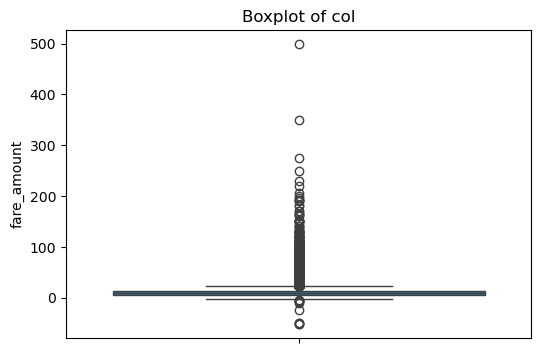

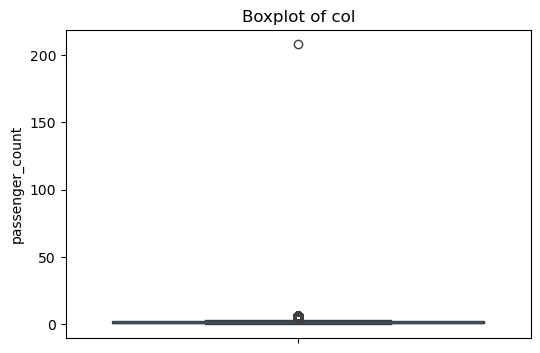

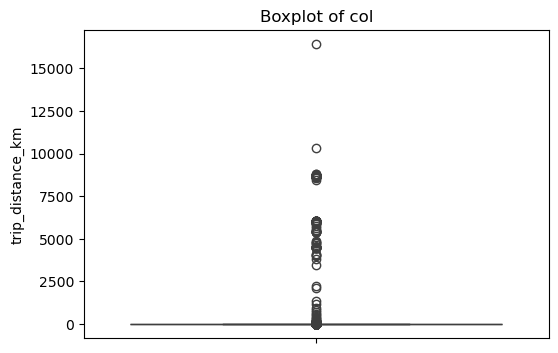

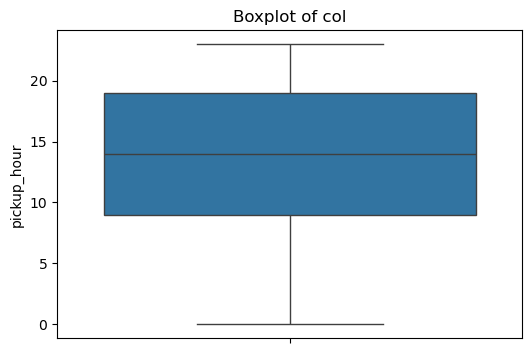

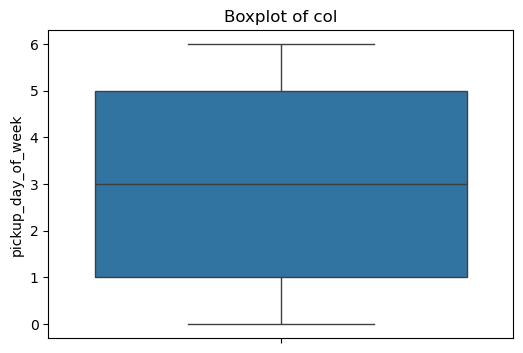

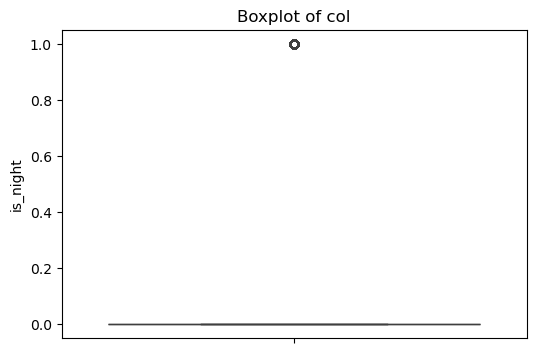

In [24]:
for col in ['fare_amount', 'passenger_count', 'trip_distance_km', 'pickup_hour',
       'pickup_day_of_week', 'is_night']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {'col'}')
    plt.show()

In [25]:
df = df[(df['fare_amount'] > 2) & (df['fare_amount'] < 200)]


In [31]:
df

,Unnamed: 0,fare_amount,passenger_count,trip_distance_km,pickup_hour,pickup_day_of_week,is_night
0,24238194,7.5,1,1.683323,19,3,0
1,27835199,7.7,1,2.457590,20,4,0
2,44984355,12.9,1,5.036377,21,0,0
3,25894730,5.3,3,1.661683,8,4,0
4,17610152,16.0,5,4.475450,17,3,0
...,...,...,...,...,...,...,...
199995,42598914,3.0,1,0.112210,10,6,0
199996,16382965,7.5,1,1.875050,1,4,1
199997,27804658,30.9,2,12.850319,0,0,1
199998,20259894,14.5,1,3.539715,14,2,0


In [36]:
df = df[(df['trip_distance_km'] > 0.1) & (df['trip_distance_km'] < 100)]


In [37]:
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]


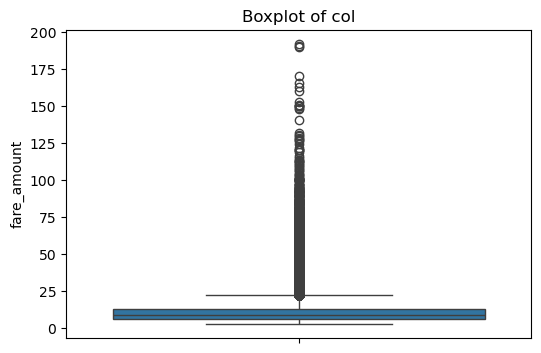

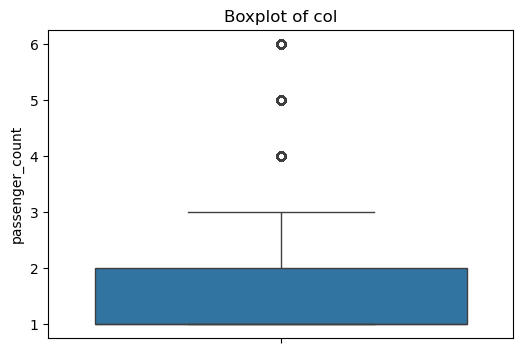

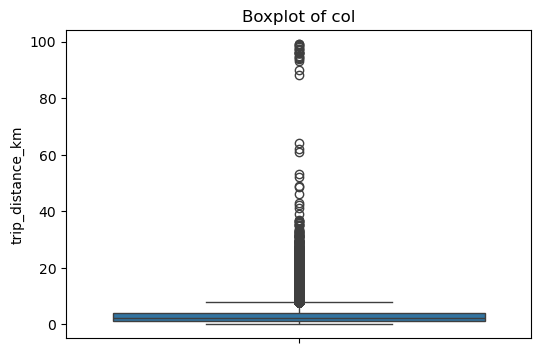

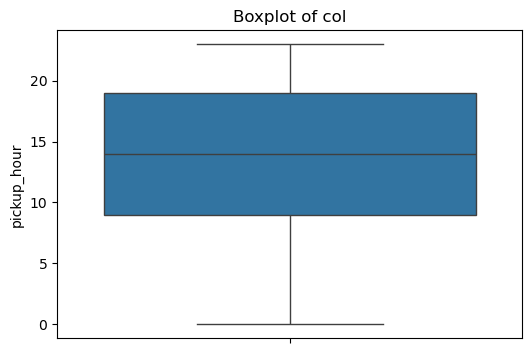

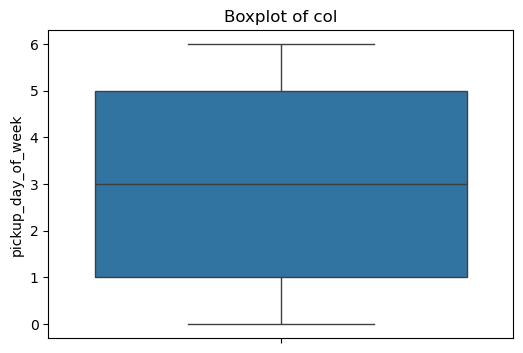

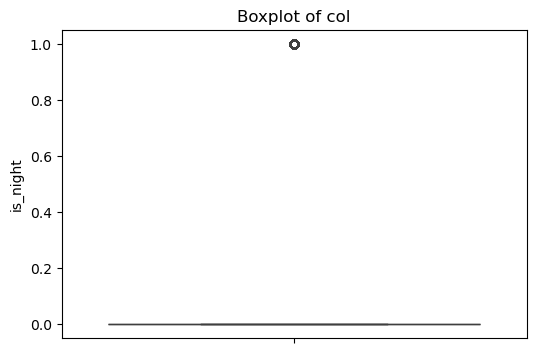

In [38]:
for col in ['fare_amount', 'passenger_count', 'trip_distance_km', 'pickup_hour',
       'pickup_day_of_week', 'is_night']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {'col'}')
    plt.show()

In [39]:
df = df[(df['fare_amount'] > 2) & (df['fare_amount'] < 100)]


In [40]:
df = df[df['trip_distance_km'] < 50]


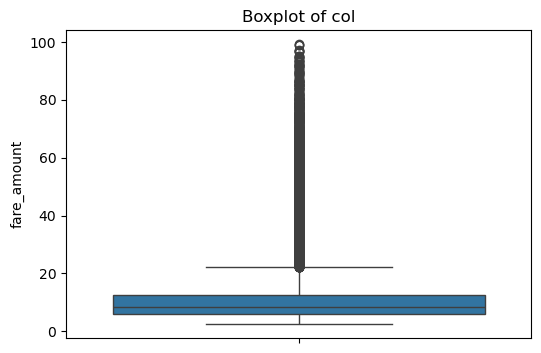

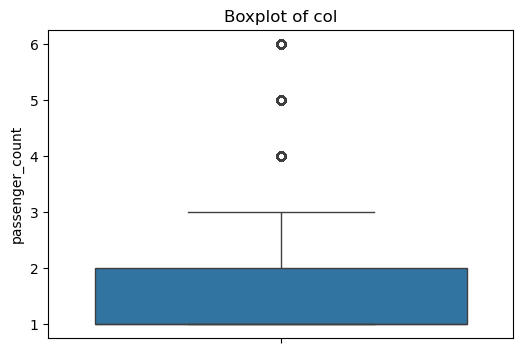

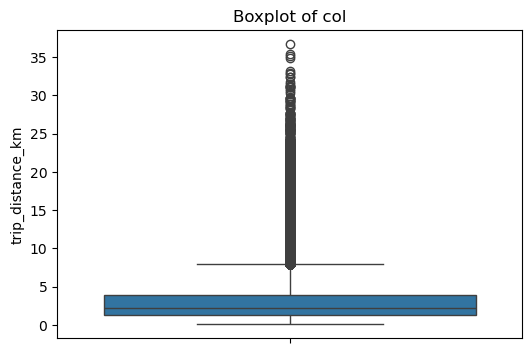

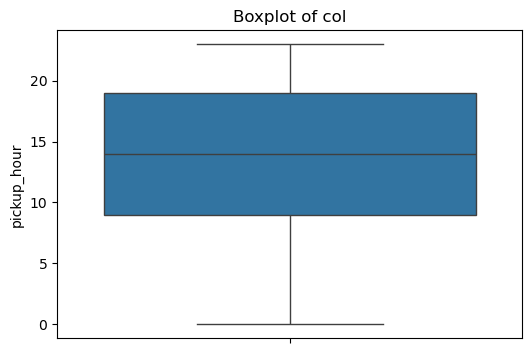

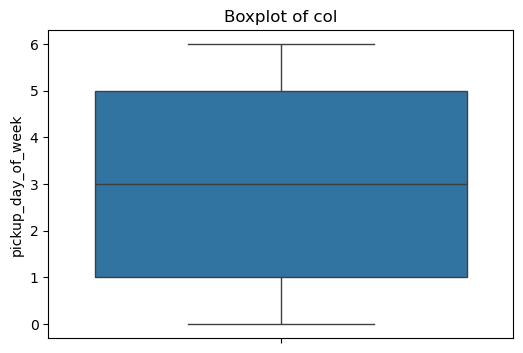

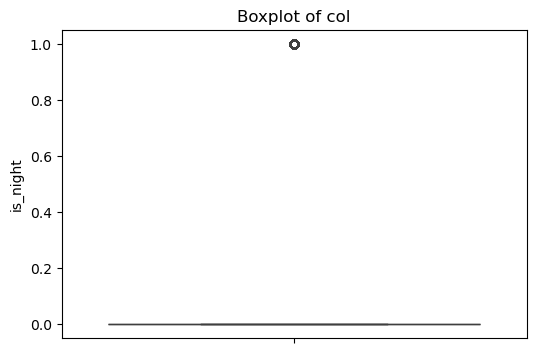

In [41]:
for col in ['fare_amount', 'passenger_count', 'trip_distance_km', 'pickup_hour',
       'pickup_day_of_week', 'is_night']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {'col'}')
    plt.show()

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

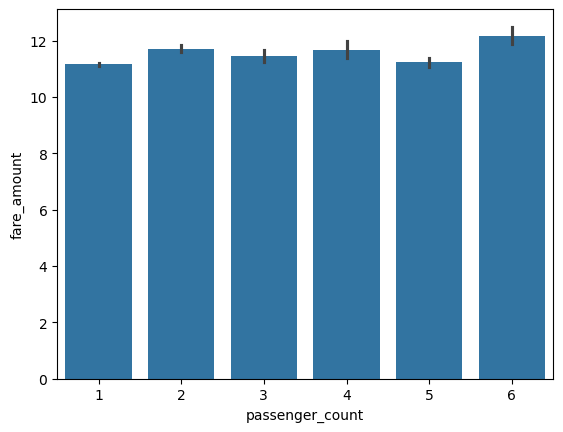

In [42]:
sns.barplot(x='passenger_count', y='fare_amount', data=df)


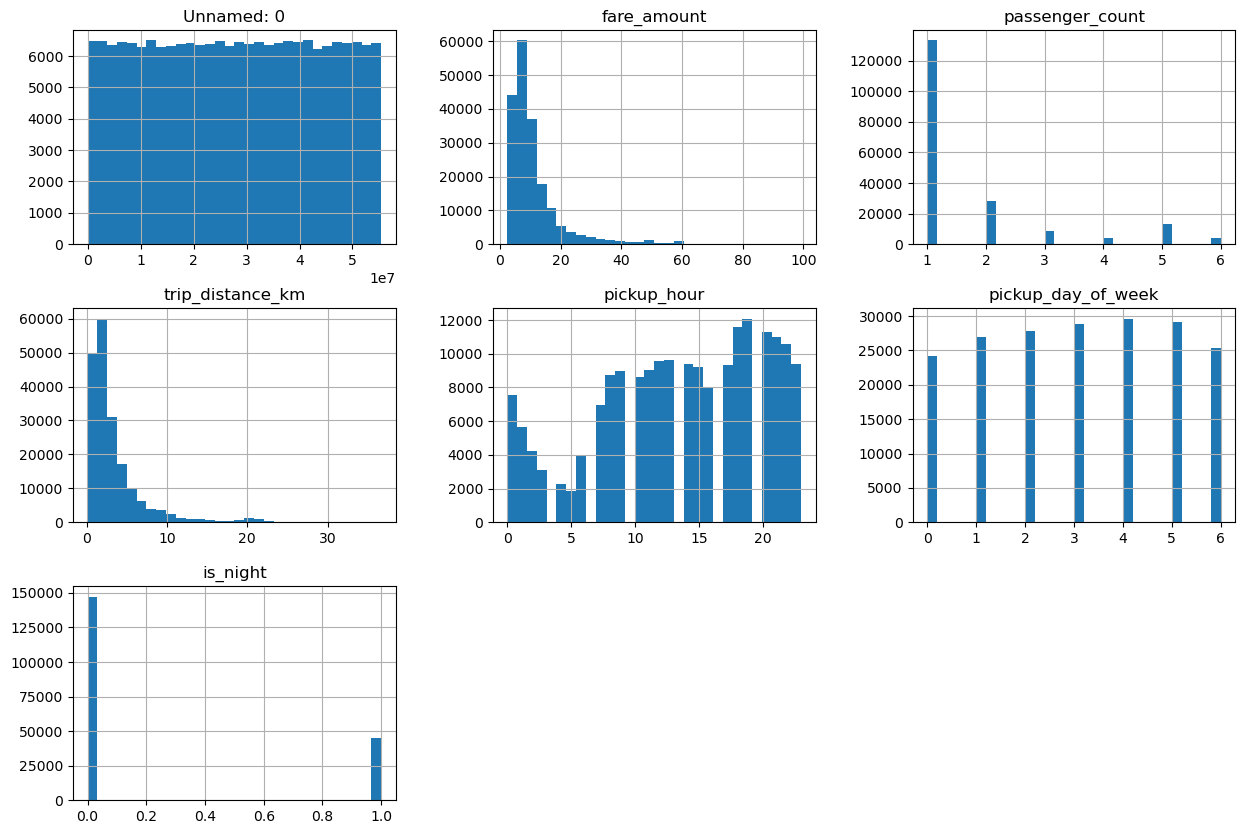

In [49]:
df.hist(figsize=(15, 10), bins=30)
plt.show()


In [50]:
df.select_dtypes(np.number).corr()

,Unnamed: 0,fare_amount,passenger_count,trip_distance_km,pickup_hour,pickup_day_of_week,is_night
Unnamed: 0,1.000000,-0.000140,0.002374,-0.000525,0.000281,-0.004682,-0.002877
fare_amount,-0.000140,1.000000,0.014482,0.901912,-0.020405,0.004493,0.025346
passenger_count,0.002374,0.014482,1.000000,0.008404,0.014906,0.036433,0.024489
trip_distance_km,-0.000525,0.901912,0.008404,1.000000,-0.033459,0.017221,0.078424
pickup_hour,0.000281,-0.020405,0.014906,-0.033459,1.000000,-0.086205,-0.210737
pickup_day_of_week,-0.004682,0.004493,0.036433,0.017221,-0.086205,1.000000,0.145920
is_night,-0.002877,0.025346,0.024489,0.078424,-0.210737,0.145920,1.000000


<Axes: >

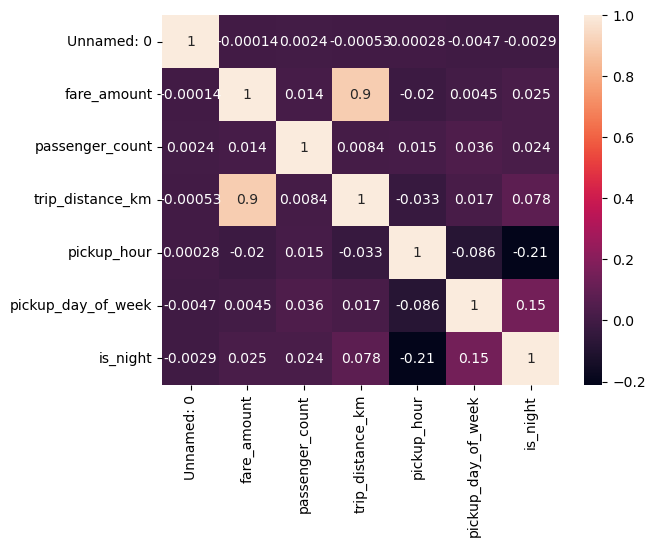

In [51]:
sns.heatmap(df.select_dtypes(np.number).corr(),annot=True)

In [52]:
df.columns

Index(['Unnamed: 0', 'fare_amount', 'passenger_count', 'trip_distance_km',
       'pickup_hour', 'pickup_day_of_week', 'is_night'],
      dtype='object')

In [56]:
 df,_ = train_test_split(df, train_size=15000, random_state=42)

# Pipeline

In [60]:
fv=df.loc[:,['passenger_count', 'trip_distance_km', 'pickup_hour',
       'pickup_day_of_week', 'is_night']]
cv=df.loc[:,'fare_amount']

In [61]:
fv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 70614 to 127105
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   passenger_count     15000 non-null  int64  
 1   trip_distance_km    15000 non-null  float64
 2   pickup_hour         15000 non-null  int32  
 3   pickup_day_of_week  15000 non-null  int32  
 4   is_night            15000 non-null  int64  
dtypes: float64(1), int32(2), int64(2)
memory usage: 585.9 KB


In [62]:
fv.shape,cv.shape

((15000, 5), (15000,))

In [66]:
cont_val=fv.select_dtypes(exclude='object').columns


In [67]:
cont_val

Index(['passenger_count', 'trip_distance_km', 'pickup_hour',
       'pickup_day_of_week', 'is_night'],
      dtype='object')

In [68]:
from sklearn.pipeline import Pipeline

In [69]:
cont_pl=Pipeline(steps=[('Scaling',RobustScaler()),
                         ('powerTransformation',PowerTransformer())])

In [70]:
fv.columns

Index(['passenger_count', 'trip_distance_km', 'pickup_hour',
       'pickup_day_of_week', 'is_night'],
      dtype='object')

In [71]:
ct=ColumnTransformer(transformers=[('continuos transformer',cont_pl,[0,1,2,3,4])],remainder='passthrough')

In [73]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=2)

In [74]:
x_train=ct.fit_transform(x_train)
x_test=ct.transform(x_test)

In [75]:
x_train.shape,y_train.shape

((12000, 5), (12000,))

In [76]:
x_train

array([[-0.66320645,  1.32690762, -1.71046911,  1.52997392,  1.8630456 ],
       [-0.66320645, -0.59822075, -0.90936252, -1.05100988, -0.53675552],
       [-0.66320645, -0.36418956,  1.25093146, -1.05100988, -0.53675552],
       ...,
       [-0.66320645,  0.13308384, -1.03360277, -0.03659731, -0.53675552],
       [-0.66320645, -0.18943983,  0.84082679,  1.52997392, -0.53675552],
       [-0.66320645,  1.23016268, -1.27123241,  1.52997392,  1.8630456 ]])

In [77]:
12000**0.5

109.54451150103323

# Hyperparameter Tuning using Optuna

##### Voting Ensemble

In [98]:
def objective(trial):
    k1=trial.suggest_int('n_neighbour1',5,20)
    p1=trial.suggest_categorical('distance1',[1,2])
    w1=trial.suggest_categorical('weights1',['uniform','distance'])
    algor1=trial.suggest_categorical('alg1',['ball_tree','kd_tree','brute'])
    model1=KNeighborsRegressor(n_neighbors=k1,p=p1,weights=w1,algorithm=algor1)

    k2=trial.suggest_int('n_neighbour2',50,200)
    p2=trial.suggest_categorical('distance2',[1,2])
    w2=trial.suggest_categorical('weights2',['uniform','distance'])
    algor2=trial.suggest_categorical('alg2',['ball_tree','kd_tree','brute'])
    model2=KNeighborsRegressor(n_neighbors=k2,p=p2,weights=w2,algorithm=algor2)

    depth1=trial.suggest_int('depth',2,15)
    sample_split1=trial.suggest_int('sample_splits',2,20)
    sample_leaf1=trial.suggest_int('sample_leaf',2,20)
    min_impurity1=trial.suggest_float('impurity_dec',0.1,0.5)
    m_feature1=trial.suggest_categorical('max_f',[None,'sqrt','log2'])
    model3=DecisionTreeRegressor(max_depth=depth1,min_samples_split=sample_split1,min_samples_leaf=sample_leaf1,
                                 min_impurity_decrease=min_impurity1,max_features=m_feature1)
    
    vc=VotingRegressor(estimators=[('knn1',model1),('knn2',model2),('dt',model3)],n_jobs=-1)
    test_acc=cross_validate(estimator=vc,X=x_train,y=y_train,cv=3,scoring="r2")["test_score"].mean()
    train_acc=cross_validate(estimator=vc,X=x_train,y=y_train,cv=3,scoring="r2",return_train_score=True)["train_score"].mean()
    trial.set_user_attr("train_accuracy",train_acc)

    return test_acc

In [100]:
study=optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())
study.optimize(objective,n_trials=100,n_jobs=-1)

[I 2025-04-07 10:28:32,421] A new study created in memory with name: no-name-5122507d-4fb4-42fd-8ef7-acce8af3fe15
[I 2025-04-07 10:28:38,746] Trial 5 finished with value: 0.6746823032289687 and parameters: {'n_neighbour1': 14, 'distance1': 2, 'weights1': 'distance', 'alg1': 'kd_tree', 'n_neighbour2': 92, 'distance2': 2, 'weights2': 'uniform', 'alg2': 'kd_tree', 'depth': 12, 'sample_splits': 5, 'sample_leaf': 4, 'impurity_dec': 0.30340712790485747, 'max_f': 'sqrt'}. Best is trial 5 with value: 0.6746823032289687.
[I 2025-04-07 10:28:41,022] Trial 10 finished with value: 0.7961602916100857 and parameters: {'n_neighbour1': 17, 'distance1': 1, 'weights1': 'uniform', 'alg1': 'ball_tree', 'n_neighbour2': 97, 'distance2': 1, 'weights2': 'distance', 'alg2': 'kd_tree', 'depth': 3, 'sample_splits': 15, 'sample_leaf': 12, 'impurity_dec': 0.16734631914108214, 'max_f': None}. Best is trial 10 with value: 0.7961602916100857.
[I 2025-04-07 10:28:41,046] Trial 8 finished with value: 0.6740842303382916

In [101]:
study.best_params


{'n_neighbour1': 11,
 'distance1': 2,
 'weights1': 'uniform',
 'alg1': 'brute',
 'n_neighbour2': 67,
 'distance2': 1,
 'weights2': 'distance',
 'alg2': 'brute',
 'depth': 10,
 'sample_splits': 6,
 'sample_leaf': 19,
 'impurity_dec': 0.22089647369783327,
 'max_f': None}

In [102]:
study.best_value

0.8028053735779747

C:\Users\HP\AppData\Local\Temp\ipykernel_28956\3902152518.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


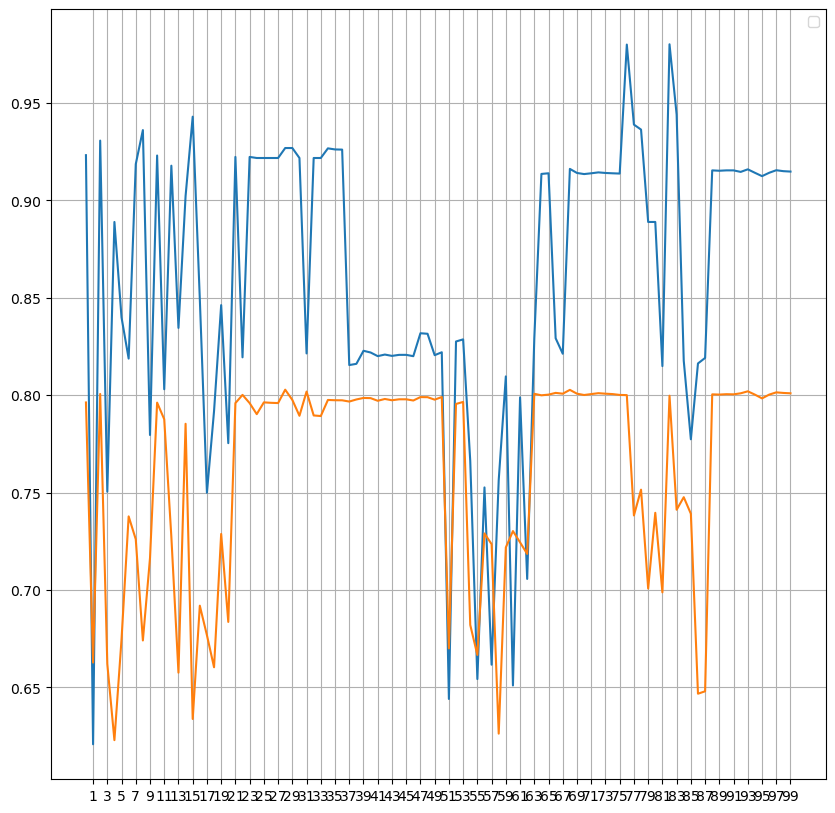

In [103]:
plt.figure(figsize=(10,10))
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["user_attrs_train_accuracy"])
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["value"])
plt.xticks(range(1,100,2))
plt.grid()
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_28956\1337137365.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


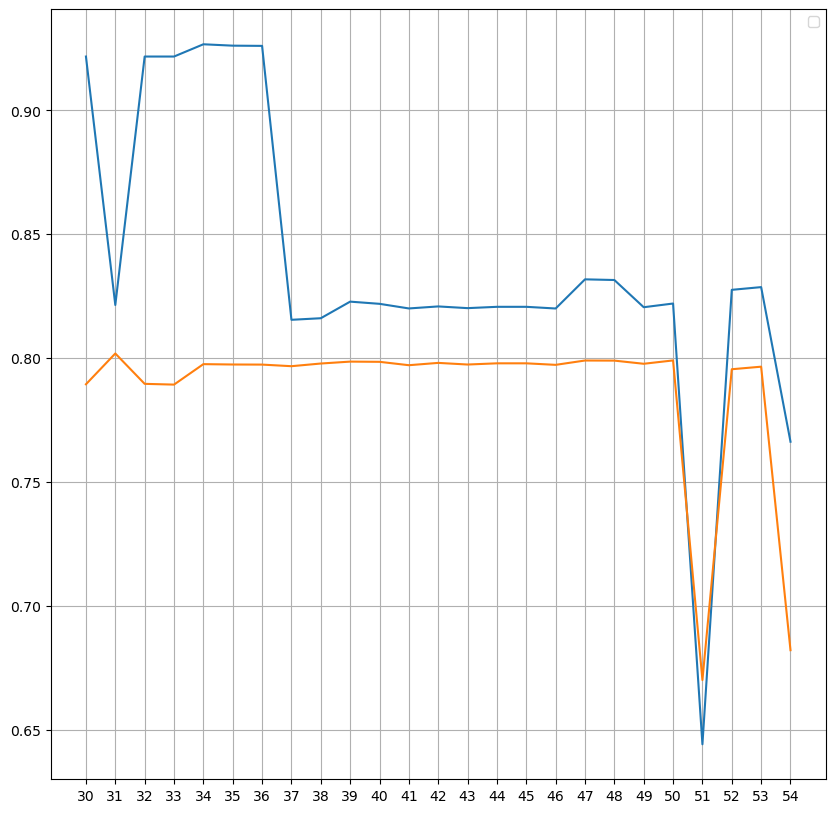

In [112]:
plt.figure(figsize=(10,10))
plt.plot(study.trials_dataframe()["number"][30:55],study.trials_dataframe()["user_attrs_train_accuracy"][30:55])
plt.plot(study.trials_dataframe()["number"][30:55],study.trials_dataframe()["value"][30:55])
plt.xticks(range(30,55))
plt.grid()
plt.legend()
plt.show()

In [114]:
study.trials_dataframe().iloc[37]

number                                               37
value                                          0.796705
datetime_start               2025-04-07 10:29:12.662482
datetime_complete            2025-04-07 10:29:32.174869
duration                         0 days 00:00:19.512387
params_alg1                                   ball_tree
params_alg2                                       brute
params_depth                                         15
params_distance1                                      2
params_distance2                                      1
params_impurity_dec                            0.107308
params_max_f                                       None
params_n_neighbour1                                  11
params_n_neighbour2                                  83
params_sample_leaf                                   18
params_sample_splits                                 12
params_weights1                                 uniform
params_weights2                                 

In [116]:

vc=VotingRegressor(estimators=[('knn1',KNeighborsRegressor(n_neighbors=11,weights='uniform',algorithm='ball_tree',p=2)),('knn2',KNeighborsRegressor(n_neighbors=83,weights='uniform',algorithm='brute',p=1)),('dt',DecisionTreeRegressor(max_depth=15,min_samples_split=12,min_samples_leaf=18,
                                 min_impurity_decrease=0.107308,max_features=None))],n_jobs=-1)

In [118]:
vc.fit(x_train,y_train)

VotingRegressor(estimators=[('knn1',
                             KNeighborsRegressor(algorithm='ball_tree',
                                                 n_neighbors=11)),
                            ('knn2',
                             KNeighborsRegressor(algorithm='brute',
                                                 n_neighbors=83, p=1)),
                            ('dt',
                             DecisionTreeRegressor(max_depth=15,
                                                   min_impurity_decrease=0.107308,
                                                   min_samples_leaf=18,
                                                   min_samples_split=12))],
                n_jobs=-1)

In [119]:
yi_cap=vc.predict(x_test)

In [122]:
r2_score(y_test,yi_cap)

0.810294599202195

# bagging

In [239]:
# def objective(trial):
#     k=trial.suggest_int('n_neighbors',2,10)
#     p1=trial.suggest_categorical('distance',[1,2])
#     w=trial.suggest_categorical('weights',['uniform','distance'])
#     algor=trial.suggest_categorical('alg',['ball_tree','kd_tree','brute'])
    
#     model=KNeighborsRegressor(n_neighbors=k,p=p1,weights=w,algorithm=algor)

    
#     n_estimators1=trial.suggest_int('n_estimator',2,50)
#     max_samples1=trial.suggest_int('samples',200,1000)
#     # bootstrap1=trial.suggest_categorical('bootstraps',[True,False])
   

#     be=BaggingRegressor(estimator=model,n_estimators=n_estimators1,bootstrap=bootstrap1,max_samples=max_samples1)
#     test_acc=cross_validate(estimator=be,X=x_train,y=y_train,cv=3,scoring="r2")["test_score"].mean()
#     train_acc=cross_validate(estimator=be,X=x_train,y=y_train,cv=3,scoring="r2",return_train_score=True)["train_score"].mean()
#     trial.set_user_attr("train_accuracy",train_acc)

#     return test_acc

In [125]:
def objective(trial):
    # Select model type
    model_type = trial.suggest_categorical('model', ['KNN', 'DecisionTree'])

    if model_type == 'KNN':
        k = trial.suggest_int('n_neighbors', 3, 50)
        p1 = trial.suggest_categorical('distance', [1, 2])
        w = trial.suggest_categorical('weights', ['uniform', 'distance'])
        algor = trial.suggest_categorical('alg', ['ball_tree', 'kd_tree', 'brute'])
        model = KNeighborsRegressor(n_neighbors=k, p=p1, weights=w, algorithm=algor)
    
    else:  # DecisionTreeRegressor
        # max_depth = trial.suggest_int('max_depth', 2, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
        
        model = DecisionTreeRegressor(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

    # Bagging Regressor Parameters
    n_estimators1 = trial.suggest_int('n_estimators', 2, 50)
    max_samples1 = trial.suggest_int('samples',200,1000)
    # bootstrap1 = trial.suggest_categorical('bootstrap', [True, False])

    # Bagging with selected model
    be = BaggingRegressor(estimator=model, n_estimators=n_estimators1,  max_samples=max_samples1)

    # Cross-validation for performance evaluation
    test_acc = cross_validate(estimator=be, X=x_train, y=y_train, cv=4, scoring="r2")["test_score"].mean()
    train_acc = cross_validate(estimator=be, X=x_train, y=y_train, cv=4, scoring="r2", return_train_score=True)["train_score"].mean()
    
    # Store train accuracy for analysis
    trial.set_user_attr("train_accuracy", train_acc)

    return test_acc


In [127]:
study=optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())
study.optimize(objective,n_trials=100,n_jobs=-1)

[I 2025-04-07 10:37:08,917] A new study created in memory with name: no-name-86384259-133a-4d5b-a80c-b923f6b0fceb
[I 2025-04-07 10:37:10,437] Trial 10 finished with value: 0.808414366321194 and parameters: {'model': 'DecisionTree', 'min_samples_split': 9, 'min_samples_leaf': 5, 'n_estimators': 4, 'samples': 326}. Best is trial 10 with value: 0.808414366321194.
[I 2025-04-07 10:37:10,695] Trial 1 finished with value: 0.8153260004169525 and parameters: {'model': 'DecisionTree', 'min_samples_split': 10, 'min_samples_leaf': 5, 'n_estimators': 5, 'samples': 713}. Best is trial 1 with value: 0.8153260004169525.
[I 2025-04-07 10:37:11,483] Trial 0 finished with value: 0.8036215621192399 and parameters: {'model': 'DecisionTree', 'min_samples_split': 4, 'min_samples_leaf': 1, 'n_estimators': 8, 'samples': 646}. Best is trial 1 with value: 0.8153260004169525.
[I 2025-04-07 10:37:12,048] Trial 2 finished with value: 0.8132448027272354 and parameters: {'model': 'DecisionTree', 'min_samples_split':

In [128]:
study.best_params


{'model': 'DecisionTree',
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'n_estimators': 50,
 'samples': 988}

In [129]:
study.best_value

0.8263935170118996

In [130]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_alg,params_distance,params_min_samples_leaf,params_min_samples_split,params_model,params_n_estimators,params_n_neighbors,params_samples,params_weights,user_attrs_train_accuracy,state
0,0,0.803622,2025-04-07 10:37:08.923587,2025-04-07 10:37:11.483354,0 days 00:00:02.559767,NaN,NaN,1.0,4.0,DecisionTree,8,NaN,646,NaN,0.827013,COMPLETE
1,1,0.815326,2025-04-07 10:37:08.924686,2025-04-07 10:37:10.695866,0 days 00:00:01.771180,NaN,NaN,5.0,10.0,DecisionTree,5,NaN,713,NaN,0.825154,COMPLETE
2,2,0.813245,2025-04-07 10:37:08.926781,2025-04-07 10:37:12.047786,0 days 00:00:03.121005,NaN,NaN,3.0,2.0,DecisionTree,10,NaN,314,NaN,0.820676,COMPLETE
3,3,0.814322,2025-04-07 10:37:08.927877,2025-04-07 10:37:13.997219,0 days 00:00:05.069342,NaN,NaN,1.0,5.0,DecisionTree,17,NaN,510,NaN,0.830762,COMPLETE
4,4,0.809716,2025-04-07 10:37:08.928964,2025-04-07 10:37:12.500838,0 days 00:00:03.571874,NaN,NaN,2.0,7.0,DecisionTree,11,NaN,210,NaN,0.819407,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.823021,2025-04-07 10:39:05.459056,2025-04-07 10:39:13.996915,0 days 00:00:08.537859,NaN,NaN,4.0,3.0,DecisionTree,50,NaN,905,NaN,0.839095,COMPLETE
96,96,0.825347,2025-04-07 10:39:05.983331,2025-04-07 10:39:14.094606,0 days 00:00:08.111275,NaN,NaN,4.0,2.0,DecisionTree,50,NaN,878,NaN,0.838577,COMPLETE
97,97,0.826394,2025-04-07 10:39:07.277155,2025-04-07 10:39:14.432864,0 days 00:00:07.155709,NaN,NaN,4.0,2.0,DecisionTree,50,NaN,988,NaN,0.839882,COMPLETE
98,98,0.824389,2025-04-07 10:39:08.457309,2025-04-07 10:39:14.578741,0 days 00:00:06.121432,NaN,NaN,4.0,2.0,DecisionTree,50,NaN,897,NaN,0.838926,COMPLETE


C:\Users\HP\AppData\Local\Temp\ipykernel_28956\1982859582.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


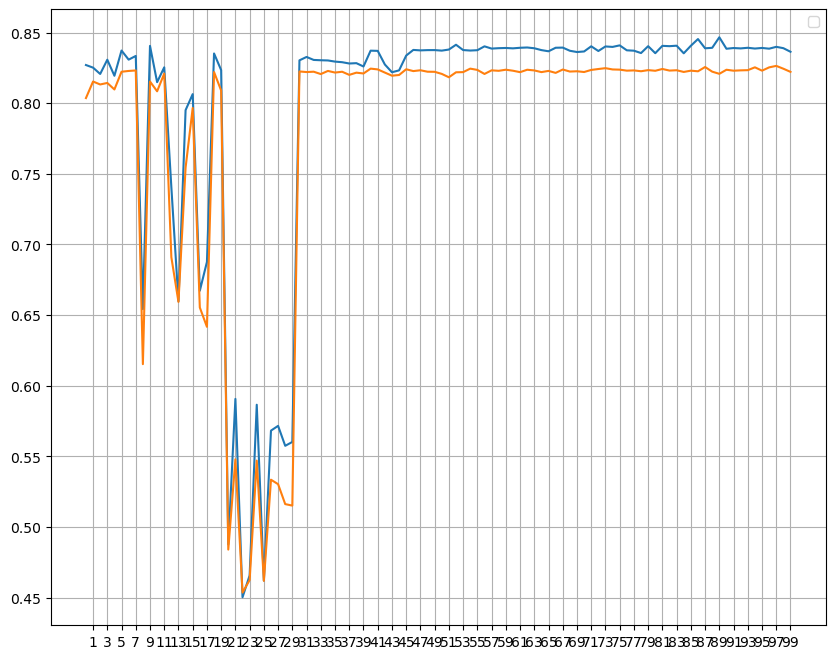

In [131]:
plt.figure(figsize=(10,8))
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["user_attrs_train_accuracy"])
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["value"])
plt.xticks(range(1,100,2))
plt.grid()
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_28956\1994883071.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


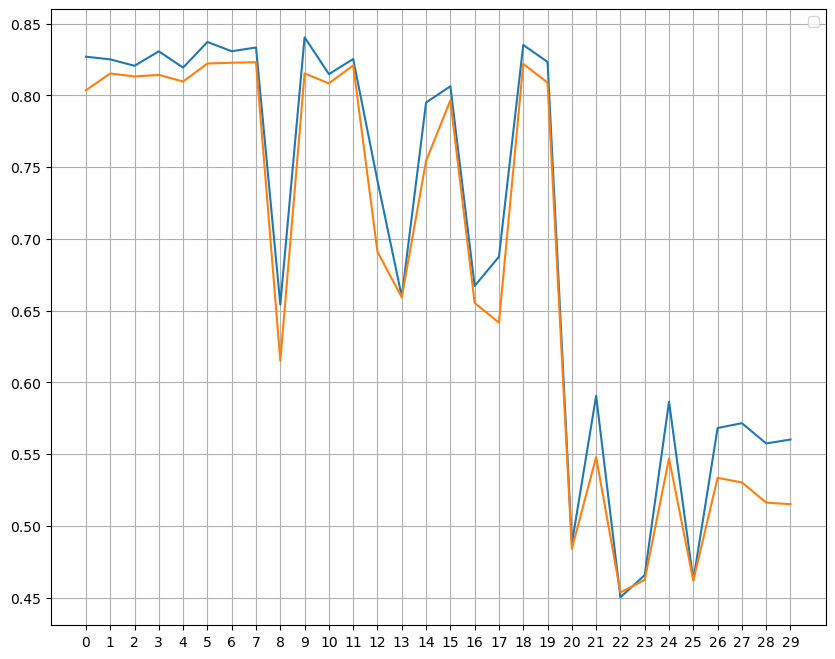

In [137]:
plt.figure(figsize=(10,8))
plt.plot(study.trials_dataframe()["number"][0:30],study.trials_dataframe()["user_attrs_train_accuracy"][0:30])
plt.plot(study.trials_dataframe()["number"][0:30],study.trials_dataframe()["value"][0:30])
plt.xticks(range(0,30))
plt.grid()
plt.legend()
plt.show()

In [139]:
study.trials_dataframe().iloc[11]

number                                               11
value                                           0.82094
datetime_start               2025-04-07 10:37:08.948988
datetime_complete            2025-04-07 10:37:16.947743
duration                         0 days 00:00:07.998755
params_alg                                          NaN
params_distance                                     NaN
params_min_samples_leaf                             5.0
params_min_samples_split                            3.0
params_model                               DecisionTree
params_n_estimators                                  33
params_n_neighbors                                  NaN
params_samples                                      299
params_weights                                      NaN
user_attrs_train_accuracy                      0.825377
state                                          COMPLETE
Name: 11, dtype: object

In [141]:
# be=BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=80,weights='uniform',algorithm='ball_tree',p=2),n_estimators=28,bootstrap=False,max_samples=600)
be = BaggingRegressor(estimator=DecisionTreeRegressor(min_samples_split=3, min_samples_leaf=5), 
                       n_estimators=33, max_samples=299)
be.fit(x_train, y_train)


BaggingRegressor(estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                                 min_samples_split=3),
                 max_samples=299, n_estimators=33)

In [143]:
be.fit(x_train,y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                                 min_samples_split=3),
                 max_samples=299, n_estimators=33)

In [145]:
yi_cap=be.predict(x_test)
r2_score(y_test,yi_cap)


0.824139873972189

In [147]:
from sklearn.dummy import DummyRegressor

In [241]:
# from sklearn.dummy import DummyRegressor
# from sklearn.metrics import r2_score

# # Use 'mean' strategy instead of 'most_frequent'
# dm = DummyRegressor(strategy='mean')
# dm.fit(x_train, y_train)

# # Predict and calculate R² score
# r2 = r2_score(y_test, dm.predict(x_test))
# print("R² Score:", r2)


## Bagging Ensemble (Random Forest)

In [149]:
def objective(trial):
    sample_split1=trial.suggest_int('sample_splits',2,20)
    sample_leaf1=trial.suggest_int('sample_leaf',2,20)
    m_feature1=trial.suggest_categorical('max_f',['sqrt','log2'])
    n_estimators1=trial.suggest_int('n_estimator',2,50)
    max_samples1=trial.suggest_int('samples',200,1000)
    min_impurity1=trial.suggest_float('impurity_dec',0.01,0.1)
    
    rf=RandomForestRegressor(n_estimators=n_estimators1,max_features=m_feature1,max_samples=max_samples1,
                              bootstrap=True,min_samples_split=sample_split1,min_samples_leaf=sample_leaf1,
                                 min_impurity_decrease=min_impurity1)
    test_acc=cross_validate(estimator=rf,X=x_train,y=y_train,cv=3,scoring="r2")["test_score"].mean()
    train_acc=cross_validate(estimator=rf,X=x_train,y=y_train,cv=3,scoring="r2",return_train_score=True)["train_score"].mean()
    trial.set_user_attr("train_accuracy",train_acc)

    return test_acc

In [151]:
study=optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())
study.optimize(objective,n_trials=100,n_jobs=-1)

[I 2025-04-07 10:41:49,221] A new study created in memory with name: no-name-4e5b356f-8a86-4312-8f97-7da7d38899e9
[I 2025-04-07 10:41:50,222] Trial 4 finished with value: 0.7042158410574005 and parameters: {'sample_splits': 18, 'sample_leaf': 4, 'max_f': 'sqrt', 'n_estimator': 2, 'samples': 815, 'impurity_dec': 0.03735724124845759}. Best is trial 4 with value: 0.7042158410574005.
[I 2025-04-07 10:41:50,777] Trial 7 finished with value: 0.686463257781718 and parameters: {'sample_splits': 14, 'sample_leaf': 17, 'max_f': 'sqrt', 'n_estimator': 5, 'samples': 940, 'impurity_dec': 0.05920722446077313}. Best is trial 4 with value: 0.7042158410574005.
[I 2025-04-07 10:41:51,980] Trial 1 finished with value: 0.718137493449556 and parameters: {'sample_splits': 14, 'sample_leaf': 16, 'max_f': 'sqrt', 'n_estimator': 12, 'samples': 489, 'impurity_dec': 0.021337526612733644}. Best is trial 1 with value: 0.718137493449556.
[I 2025-04-07 10:41:52,428] Trial 6 finished with value: 0.6723953163208479 an

In [153]:
study.best_params


{'sample_splits': 5,
 'sample_leaf': 2,
 'max_f': 'log2',
 'n_estimator': 40,
 'samples': 731,
 'impurity_dec': 0.012102052924596908}

In [155]:
study.best_value

0.8108915741672474

In [157]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_impurity_dec,params_max_f,params_n_estimator,params_sample_leaf,params_sample_splits,params_samples,user_attrs_train_accuracy,state
0,0,0.736372,2025-04-07 10:41:49.227872,2025-04-07 10:41:55.382530,0 days 00:00:06.154658,0.095811,log2,30,10,13,941,0.721310,COMPLETE
1,1,0.718137,2025-04-07 10:41:49.228873,2025-04-07 10:41:51.980440,0 days 00:00:02.751567,0.021338,sqrt,12,16,14,489,0.719504,COMPLETE
2,2,0.799656,2025-04-07 10:41:49.236381,2025-04-07 10:41:54.763836,0 days 00:00:05.527455,0.019677,log2,36,2,6,693,0.813403,COMPLETE
3,3,0.673407,2025-04-07 10:41:49.243432,2025-04-07 10:41:52.929371,0 days 00:00:03.685939,0.085927,sqrt,22,13,14,235,0.674983,COMPLETE
4,4,0.704216,2025-04-07 10:41:49.245390,2025-04-07 10:41:50.221150,0 days 00:00:00.975760,0.037357,sqrt,2,4,18,815,0.776215,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.809635,2025-04-07 10:42:35.489270,2025-04-07 10:42:39.620694,0 days 00:00:04.131424,0.011958,log2,40,2,3,863,0.827044,COMPLETE
96,96,0.805529,2025-04-07 10:42:35.693261,2025-04-07 10:42:39.617692,0 days 00:00:03.924431,0.011990,log2,40,2,5,718,0.822739,COMPLETE
97,97,0.806934,2025-04-07 10:42:35.786210,2025-04-07 10:42:39.550535,0 days 00:00:03.764325,0.013264,log2,33,2,5,720,0.821467,COMPLETE
98,98,0.810892,2025-04-07 10:42:35.901376,2025-04-07 10:42:39.741135,0 days 00:00:03.839759,0.012102,log2,40,2,5,731,0.819203,COMPLETE


C:\Users\HP\AppData\Local\Temp\ipykernel_16072\3902152518.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


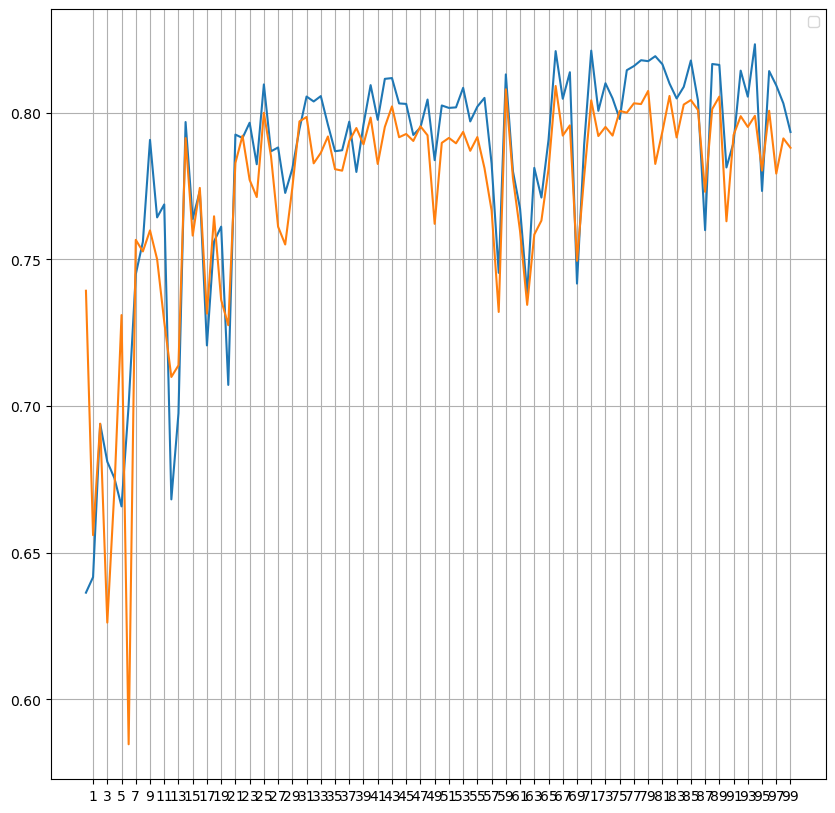

In [230]:
plt.figure(figsize=(10,10))
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["user_attrs_train_accuracy"])
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["value"])
plt.xticks(range(1,100,2))
plt.grid()
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_28956\4262772427.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


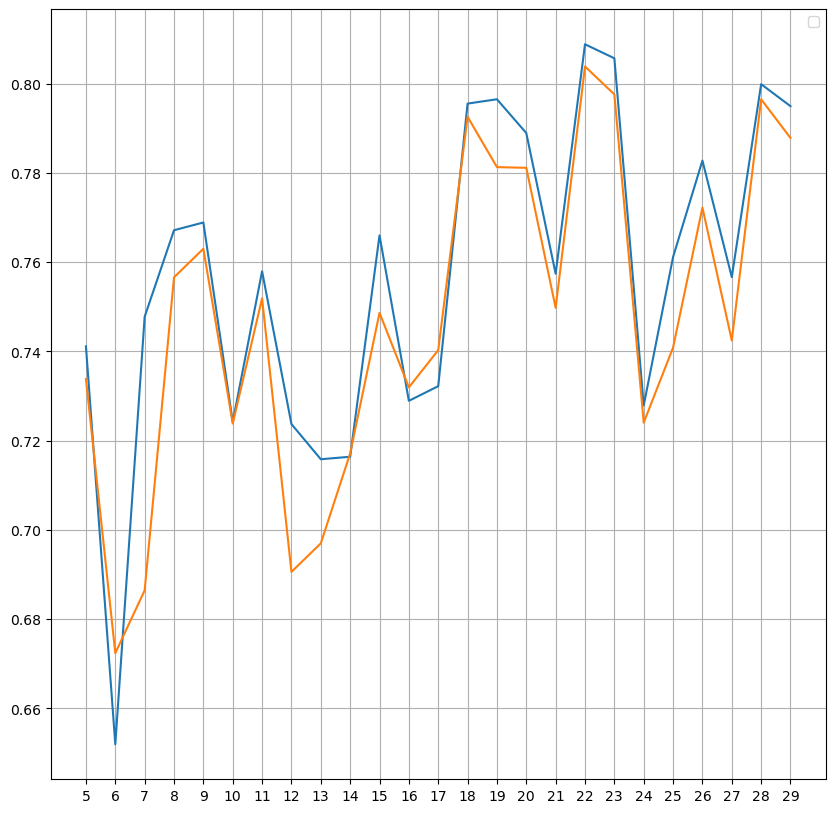

In [161]:
plt.figure(figsize=(10,10))
plt.plot(study.trials_dataframe()["number"][5:30],study.trials_dataframe()["user_attrs_train_accuracy"][5:30])
plt.plot(study.trials_dataframe()["number"][5:30],study.trials_dataframe()["value"][5:30])
plt.xticks(range(5,30))
plt.grid()
plt.legend()
plt.show()

In [163]:
study.trials_dataframe().iloc[18]

number                                               18
value                                           0.79259
datetime_start               2025-04-07 10:41:54.253023
datetime_complete            2025-04-07 10:41:59.183259
duration                         0 days 00:00:04.930236
params_impurity_dec                            0.015938
params_max_f                                       sqrt
params_n_estimator                                   24
params_sample_leaf                                    4
params_sample_splits                                 14
params_samples                                      667
user_attrs_train_accuracy                      0.795539
state                                          COMPLETE
Name: 18, dtype: object

In [165]:
rf=RandomForestRegressor(n_estimators=36,max_features='sqrt',max_samples=667,
                              bootstrap=True,min_samples_split=14,min_samples_leaf=4,
                                 min_impurity_decrease=0.015938)

In [167]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', max_samples=667,
                      min_impurity_decrease=0.015938, min_samples_leaf=4,
                      min_samples_split=14, n_estimators=36)

In [169]:
yi_cap=rf.predict(x_test)
r2_score(y_test,yi_cap)

0.7981207878798301

# Linear Regression

In [172]:
def objectives5(trial):
    poly=trial.suggest_categorical('poly',[1,2,3])
    penal=trial.suggest_categorical('penalty',['l2', 'l1', 'elasticnet'])
    alpha=trial.suggest_categorical('alpha',[0.001,0.0001,0.01,0.1,10])
    tolerance=trial.suggest_float('tol',0.001,0.2)
    if penal == 'elasticnet':
        l1_ratio = trial.suggest_float('ratio', 0.3, 1.0)
        model=SGDRegressor(penalty=penal,
                     alpha=alpha,l1_ratio=l1_ratio)
    else:
        model=SGDRegressor(penalty=penal,
                     alpha=alpha)
        
    score=cross_validate(model,PolynomialFeatures(degree=poly,interaction_only=True).fit_transform(x_train),
                         y_train,scoring='r2',cv=5,n_jobs=-1,return_train_score=True)
    trial.set_user_attr('training score',score['train_score'].mean())    
    return score['test_score'].mean()    

In [174]:
study=optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())
study.optimize(objectives5,n_trials=100,n_jobs=-1)

[I 2025-04-07 10:46:21,366] A new study created in memory with name: no-name-1ba9847d-6e0a-4d3f-bbca-e3f56ed376a5
[I 2025-04-07 10:46:24,665] Trial 0 finished with value: 0.5438119606923901 and parameters: {'poly': 3, 'penalty': 'elasticnet', 'alpha': 0.001, 'tol': 0.07549542856313572, 'ratio': 0.40880215491395405}. Best is trial 0 with value: 0.5438119606923901.
[I 2025-04-07 10:46:24,690] Trial 1 finished with value: 0.5403817586507024 and parameters: {'poly': 1, 'penalty': 'l2', 'alpha': 0.001, 'tol': 0.10939956216957832}. Best is trial 0 with value: 0.5438119606923901.
[I 2025-04-07 10:46:24,804] Trial 7 finished with value: 0.5412943387017416 and parameters: {'poly': 1, 'penalty': 'l2', 'alpha': 0.001, 'tol': 0.18507113189628735}. Best is trial 0 with value: 0.5438119606923901.
[I 2025-04-07 10:46:24,907] Trial 3 finished with value: -0.0005461642995738814 and parameters: {'poly': 1, 'penalty': 'elasticnet', 'alpha': 10, 'tol': 0.0681723347721357, 'ratio': 0.8690417256547842}. Bes

In [175]:
study.best_params

{'poly': 3, 'penalty': 'l2', 'alpha': 0.001, 'tol': 0.05494568319796884}

In [176]:
study.best_value

0.5449900832742621

In [177]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_penalty,params_poly,params_ratio,params_tol,user_attrs_training score,state
0,0,0.543812,2025-04-07 10:46:21.371835,2025-04-07 10:46:24.664633,0 days 00:00:03.292798,0.0010,elasticnet,3,0.408802,0.075495,0.545923,COMPLETE
1,1,0.540382,2025-04-07 10:46:21.374836,2025-04-07 10:46:24.690879,0 days 00:00:03.316043,0.0010,l2,1,NaN,0.109400,0.540992,COMPLETE
2,2,0.543307,2025-04-07 10:46:21.378837,2025-04-07 10:46:24.989809,0 days 00:00:03.610972,0.0100,l2,2,NaN,0.011820,0.544225,COMPLETE
3,3,-0.000546,2025-04-07 10:46:21.380835,2025-04-07 10:46:24.906326,0 days 00:00:03.525491,10.0000,elasticnet,1,0.869042,0.068172,-0.000086,COMPLETE
4,4,0.541806,2025-04-07 10:46:21.383839,2025-04-07 10:46:25.005909,0 days 00:00:03.622070,0.0001,l2,3,NaN,0.018152,0.545452,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.092728,2025-04-07 10:46:27.743223,2025-04-07 10:46:28.153857,0 days 00:00:00.410634,10.0000,l2,3,NaN,0.057261,0.092494,COMPLETE
96,96,0.095479,2025-04-07 10:46:27.804329,2025-04-07 10:46:28.188532,0 days 00:00:00.384203,10.0000,l2,3,NaN,0.054189,0.096705,COMPLETE
97,97,0.092005,2025-04-07 10:46:27.808882,2025-04-07 10:46:28.169517,0 days 00:00:00.360635,10.0000,l2,3,NaN,0.027075,0.092603,COMPLETE
98,98,0.092200,2025-04-07 10:46:27.866897,2025-04-07 10:46:28.201074,0 days 00:00:00.334177,10.0000,l2,3,NaN,0.025513,0.093568,COMPLETE


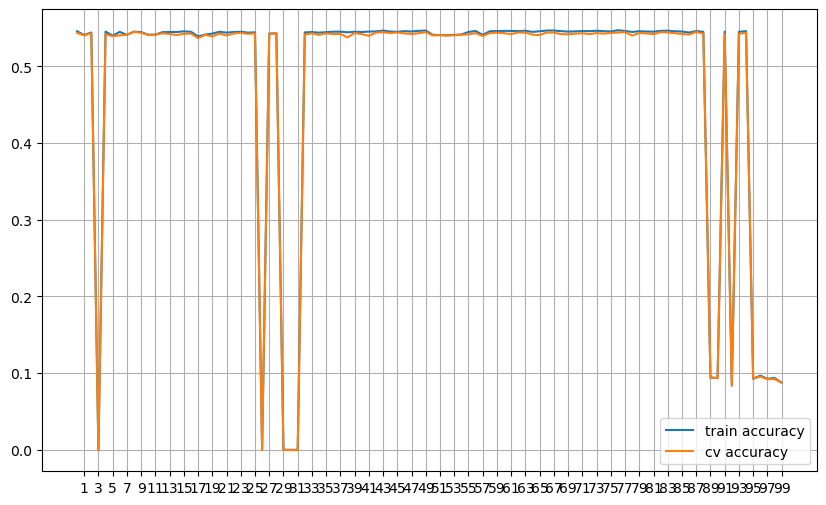

In [178]:
plt.figure(figsize=(10,6))
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["user_attrs_training score"],label='train accuracy')
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["value"],label='cv accuracy')
plt.xticks(range(1,100,2))
plt.grid()
plt.legend()
plt.show()

In [184]:
study.trials_dataframe().iloc[5]

number                                                5
value                                          0.539485
datetime_start               2025-04-07 10:46:21.388995
datetime_complete            2025-04-07 10:46:24.996344
duration                         0 days 00:00:03.607349
params_alpha                                        0.1
params_penalty                                       l2
params_poly                                           2
params_ratio                                        NaN
params_tol                                     0.030001
user_attrs_training score                      0.540112
state                                          COMPLETE
Name: 5, dtype: object

In [190]:
pf = PolynomialFeatures(degree=2,interaction_only=True)

In [188]:
x_train = pf.fit_transform(x_train)
x_test = pf.transform(x_test)

In [192]:
sgd=SGDRegressor(penalty='l2',alpha=0.1,tol= 0.030001)
sgd.fit(x_train,y_train)



SGDRegressor(alpha=0.1, tol=0.030001)

In [194]:
yi_cap=sgd.predict(x_test)
r2_score(y_test,yi_cap)

0.5470563606415648

# Pickle

In [204]:
import pickle

In [196]:
# be=BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=80,weights='uniform',algorithm='ball_tree',p=2),n_estimators=28,bootstrap=False,max_samples=600)
be = BaggingRegressor(estimator=DecisionTreeRegressor(min_samples_split=3, min_samples_leaf=5), 
                       n_estimators=33, max_samples=299)
be.fit(x_train, y_train)


BaggingRegressor(estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                                 min_samples_split=3),
                 max_samples=299, n_estimators=33)

In [198]:
final_pl = Pipeline(steps = [('transformations',ct),('estimators',be)])

In [200]:
final_pl.fit(x_train,y_train)

Pipeline(steps=[('transformations',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('continuos transformer',
                                                  Pipeline(steps=[('Scaling',
                                                                   RobustScaler()),
                                                                  ('powerTransformation',
                                                                   PowerTransformer())]),
                                                  [0, 1, 2, 3, 4])])),
                ('estimators',
                 BaggingRegressor(estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                                                  min_samples_split=3),
                                  max_samples=299, n_estimators=33))])

In [206]:
pickle.dump(final_pl,open('uber_fare_amount.pkl','wb'))

In [337]:
import pandas as pd
import pickle

# Load the trained model
with open("uber_fare_amount.pkl", "rb") as file:
    model = pickle.load(file)

# Ensure the input matches the training features
feature_columns = model.feature_names_in_  # Get expected feature names

# Example user input (Replace these with actual user inputs)
user_inputs = {
    "pickup_longitude": -73.9857,
    "pickup_latitude": 40.7484,
    "dropoff_longitude": -73.9851,
    "dropoff_latitude": 40.7480,
    "passenger_count": 2,
}

# Convert input to DataFrame with the correct columns
input_df = pd.DataFrame([user_inputs], columns=feature_columns)

# Predict fare
predicted_fare = model.predict(input_df)[0]

print(f"Predicted Fare: ${predicted_fare:.2f}")


AttributeError: 'ColumnTransformer' object has no attribute 'feature_names_in_'